# How to get the JOGL DB as a network for meta study explorations
Follow this notebook to know how to get the latest version of the JOGL DB as a network. But first let's load some libraries

## Dependencies
- networkx for anything network related
- requests for anything http and more 

In [1]:
import requests
import networkx as nx

## Let's define a few useful functions
We are going to use the API endpoint of JOGL, let's look at the documentation: https://documenter.getpostman.com/view/8688524/SWE84xMg?version=latest

Ok, so, we want the network right? https://documenter.getpostman.com/view/8688524/SWE84xMg?version=latest#86b5aa24-e54b-486b-8a73-f414b88c3744

Cool so we find the two enpoints that interest us:

- GET https://jogl-backend.herokuapp.com/api/networks  to Index all available networks 
- GET https://jogl-backend.herokuapp.com/api/networks/:id  to Get one network 

alright let's code

In [2]:
base_url = "https://jogl-backend.herokuapp.com/api/networks"

In [3]:
def get_index():
    "This function gets the index and returns the parsed json as a python dict"
    r = requests.get(base_url)
    if r.status_code != 200:
        print("Something went wrong with the request !")
    return r.json()

def print_indexes():
    json_index = get_index()
    print("Networks available:")
    for element in json_index:
        print("- Network with id={} was created at {}".format(element['id'], element['created_at']))

Great so now we can get our index, and print it nicely, let's try it

In [4]:
print_indexes()

Networks available:
- Network with id=1 was created at 2020-03-25T18:42:08.282Z
- Network with id=2 was created at 2020-03-25T22:09:16.930Z


## Get a network
Ok, now that we know which `id` are available, we can grab a network ! as we said above, we use this URL: 

- GET https://jogl-backend.herokuapp.com/api/networks/:id where we replace :id by the id we want to get

let's define a helper again

In [5]:
def get_one_network(network_id):
    url = base_url + "/" + str(network_id)
    r = requests.get(url)
    if r.status_code != 200:
        print("Something went wrong with the request !")
    return r.json()["json_network"]

In [6]:
network = get_one_network(1)

## Great, let's load it into networkx !
Ok, now that is a nice JSON network following the JSONgraph format. Cool, but, I mean, python rules, so let's load it into networkx !

In [7]:
# First we create a directed graph
G = nx.DiGraph()

In [8]:
# Then we iterate over all the nodes and add them to G
nodes = network['graph']['nodes']
for node_id in network['graph']['nodes']:
    node = nodes[node_id]
    G.add_node(node_id, type=node["type"], label=node["label"])

In [9]:
# We do the same for the edges
edges = network['graph']['edges']
for edge in edges:
    source = edge["source"]
    target = edge["target"]
    relation = edge["relation"]
    G.add_edge(source, target, relation=relation)

Awesome ! Now we can play with this network, but maybe this is going to be used by others in Cytoscape, so let's save it as GraphML ! 

In [10]:
out = "./JOGL_network.graphml"
nx.write_graphml(G, out)

# Let's plot this ?

Ok let's use the pyVis library because I never used it so let's learn ?

https://pyvis.readthedocs.io/en/latest/tutorial.html

In [11]:
from pyvis.network import Network

In [12]:
pyG = Network()

In [13]:
pyG.from_nx(G)

In [16]:
pyG.show("mygraph.html")

# Well that's a little too much oups ! 

Let's try another plotting lib, clearly pyVis collapses with that many elements ... sad !

In [19]:
import matplotlib.pyplot as plt

%matplotlib inline

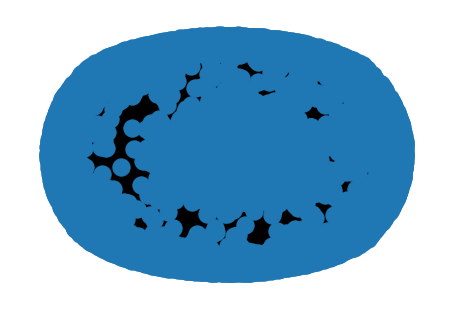

In [20]:
nx.draw_spring(G)

## Well that was slow as well ... 
Cytoscape ?

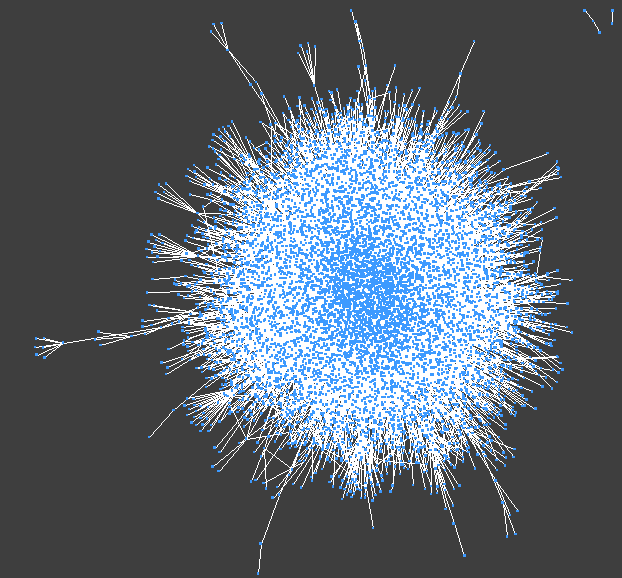

# Yeahhhh ! Alright have fun !